In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Load one .txt file and return density, ux and uy
def load_file(fr):
    filename = "fr_%04d"%fr
    contents = np.loadtxt(outdir+filename+".txt")
    header = contents[0,:]
    nx = int(header[4])
    ny = int(header[5])
    i = contents[1:nx*ny+1,0]
    j = contents[1:nx*ny+1,1]
    rho = contents[1:nx*ny+1,2].reshape(ny,nx)
    ux = contents[1:nx*ny+1,3].reshape(ny,nx)
    uy = contents[1:nx*ny+1,4].reshape(ny,nx)
    pressure = contents[1:nx*ny+1,5].reshape(ny,nx)
    speed = np.sqrt(ux*ux+uy*uy)
    return rho,ux,uy,speed,pressure

In [3]:
def channel(mat):
    for j in range(60):
        for i in range(200):
            if (i>74 and i<126):
                if (j<15 or j>43):
                    mat[j][i] = 2
    return mat

## Problem 1.1: Periodic

In [4]:
outdir = "lbm_pbc_Re001.out/"

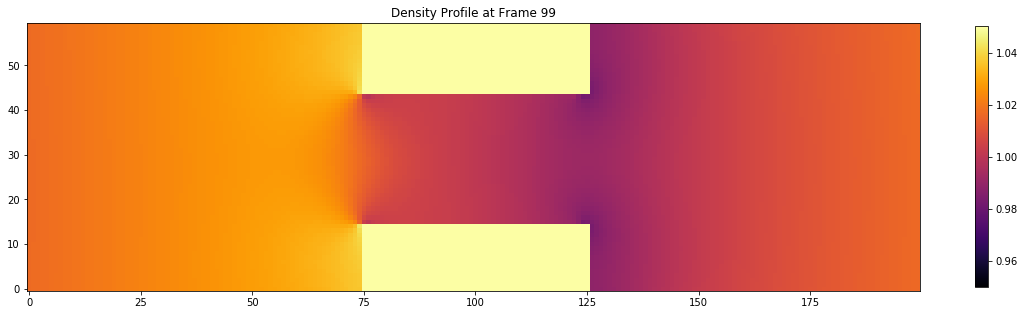

In [5]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
rho=load_file(fr)[0]
rho=channel(rho)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno,vmin=0.95,vmax=1.05)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Density Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_rho.png', bbox_inches='tight')
plt.show()

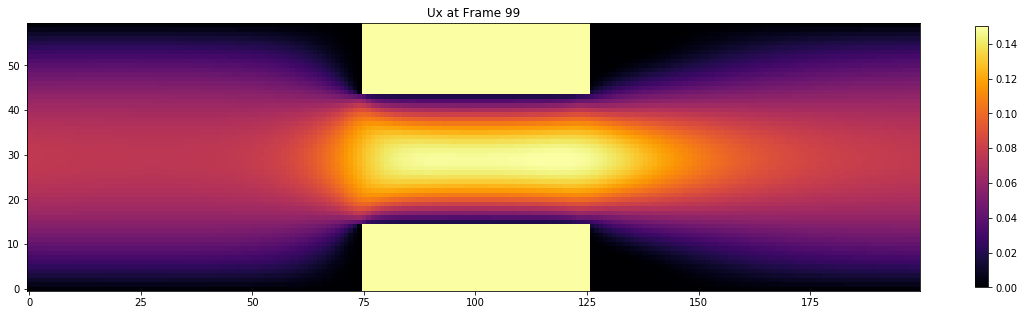

In [6]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
ux=load_file(fr)[1]
ux=channel(ux)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(ux,cmap=cm.inferno,vmin=0.00, vmax=0.15)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Ux at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_ux.png', bbox_inches='tight')
plt.show()

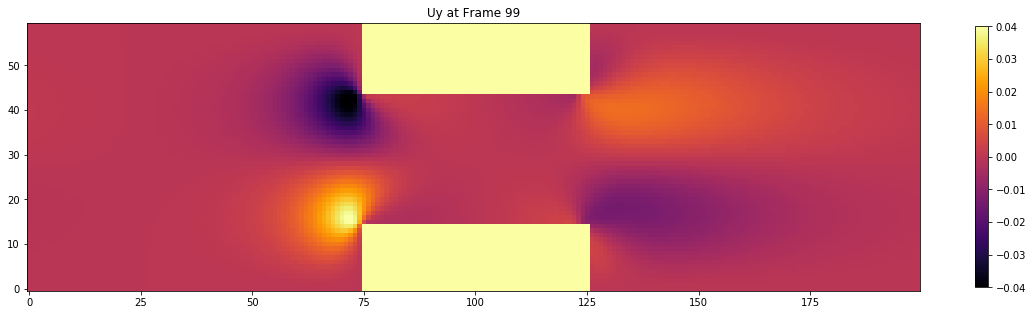

In [7]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
uy=load_file(fr)[2]
uy=channel(uy)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(uy,cmap=cm.inferno, vmin=-0.04, vmax=0.04)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Uy at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_uy.png', bbox_inches='tight')
plt.show()

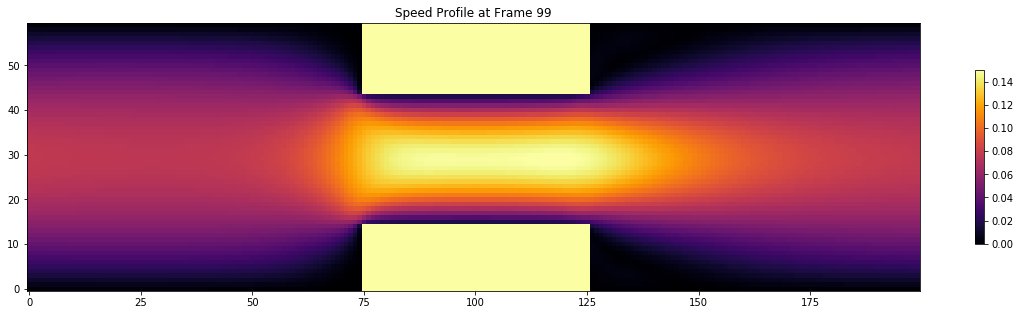

In [8]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
speed=load_file(fr)[3]
speed=channel(speed)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(speed,cmap=cm.inferno,vmin=0.00, vmax=0.15)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.4)
plt.title("Speed Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_speed.png', bbox_inches='tight')
plt.show()

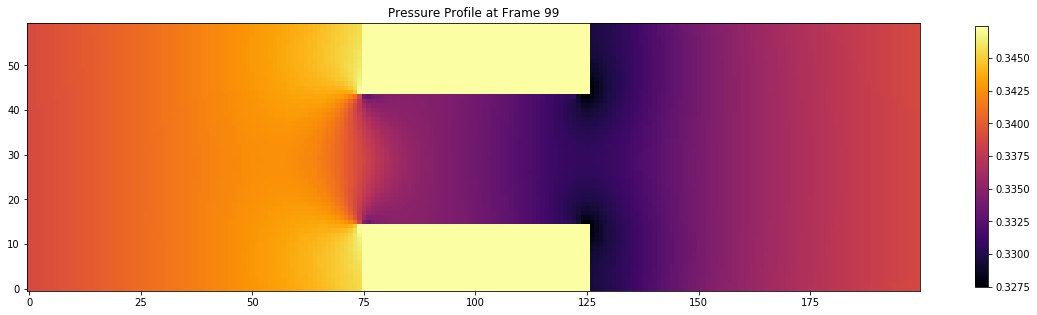

In [9]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
pressure=load_file(fr)[4]
pressure=channel(pressure)
fig, ax = plt.subplots(figsize=(20,8))
pMin = np.min(pressure)
pressure_scale = 0.02
vmin = pMin
vmax= pMin + pressure_scale 
plt.imshow(pressure,cmap=cm.inferno, vmin=vmin, vmax=vmax)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Pressure Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_pressure.png', bbox_inches='tight')
plt.show()

**Functions used to compute volume flow**

In [10]:
def channel_zero(mat):
    for j in range(60):
        for i in range(200):
            if (i>74 and i<126):
                if (j<15 or j>43):
                    mat[j][i] = 0.0
    return mat

In [11]:
def calc_volume_flow(rho, ux):
    """Compute the volume flow for this system"""
    # Compute the flux in the x-direction
    flux_x = rho * ux
    # Zero out flux in elements with tno fluid
    flux_x = channel_zero(flux_x)
    # Compute the flow at different x values
    flow_v = np.sum(flux_x, axis=0)
    # Estimate the overall volume flow as the mean of these flows
    return np.mean(flow_v)

**Sanity check - volume flow is almost the same at different x values**

In [12]:
# Compute the flux in the x-direction
flux_x = rho * ux
# Zero out flux in elements with tno fluid
flux_x = channel_zero(flux_x)
# Demonstrate that volume flow is very similar dependeng on where it is measured
for x_sample in range(0,200,20):
    flow = np.sum(flux_x[:,x_sample])
    print(f'Flow across x={x_sample} = {flow}.')

Flow across x=0 = 3.0599335593729.
Flow across x=20 = 3.0599217938874.
Flow across x=40 = 3.0599116838134996.
Flow across x=60 = 3.0599175883865004.
Flow across x=80 = 3.044154210607.
Flow across x=100 = 2.961434779727.
Flow across x=120 = 3.0414575435574998.
Flow across x=140 = 3.0599884587019246.
Flow across x=160 = 3.0599614964941995.
Flow across x=180 = 3.0599456951071.


**Compute speed in the channel and volume flow rate**

In [13]:
speed=load_file(99)[3]
print("Average velocity in the channel: %f"% np.average(speed))
print("Maximum velocity in the channel: %f"% np.max(speed))

Average velocity in the channel: 0.050695
Maximum velocity in the channel: 0.150508


In [14]:
volume_flow = calc_volume_flow(rho, ux)
print(f'Volume flow = {volume_flow:0.3f}')

Volume flow = 3.046


## Problem 1.2: Mixed

In [15]:
outdir = "lbm_mbc_Re001.out/"

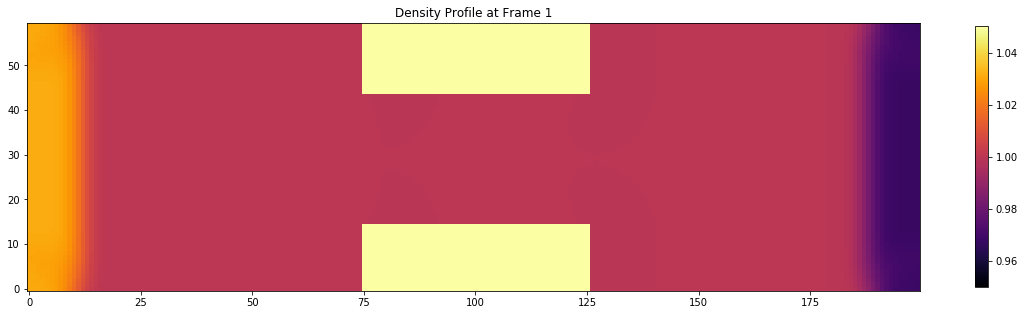

In [16]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 1
rho=load_file(fr)[0]
rho=channel(rho)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno,vmin=0.95,vmax=1.05)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Density Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_rho.png', bbox_inches='tight')
plt.show()

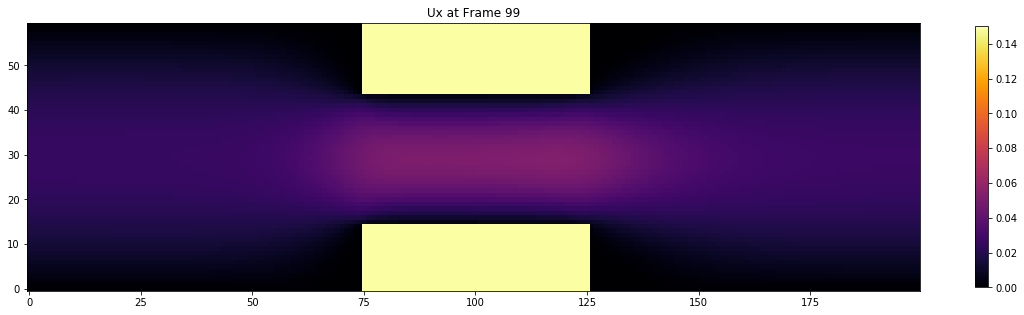

In [17]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
ux=load_file(fr)[1]
ux=channel(ux)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(ux,cmap=cm.inferno,vmin=0.00, vmax=0.15)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Ux at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_ux.png', bbox_inches='tight')
plt.show()

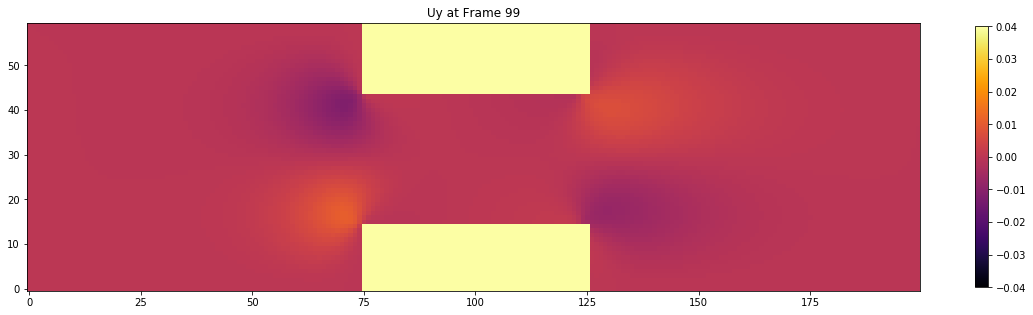

In [18]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
uy=load_file(fr)[2]
uy=channel(uy)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(uy,cmap=cm.inferno, vmin=-0.04, vmax=0.04)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Uy at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_uy.png', bbox_inches='tight')
plt.show()

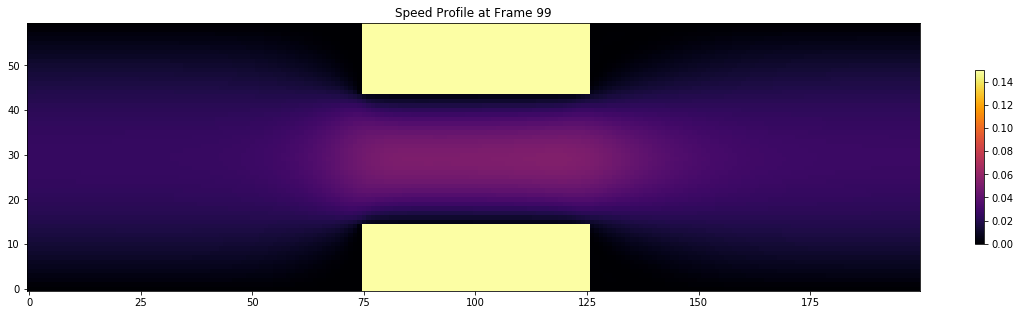

In [19]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
speed=load_file(fr)[3]
speed=channel(speed)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(speed,cmap=cm.inferno,vmin=0.00, vmax=0.15)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.4)
plt.title("Speed Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_speed.png', bbox_inches='tight')
plt.show()

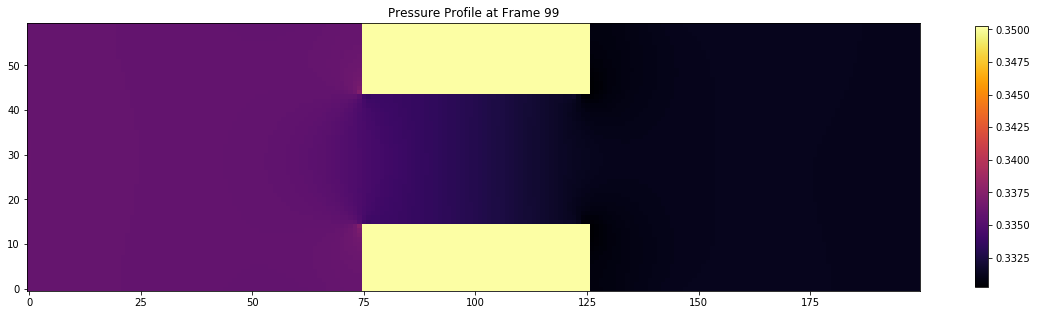

In [20]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
pressure=load_file(fr)[4]
pressure=channel(pressure)
fig, ax = plt.subplots(figsize=(20,8))
pMin = np.min(pressure)
# pMax = np.max(pressure)
# deltaP = pMax - pMin
pressure_scale = 0.02
vmin = pMin
vmax= pMin + pressure_scale 
plt.imshow(pressure,cmap=cm.inferno, vmin=vmin, vmax=vmax)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Pressure Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_pressure.png', bbox_inches='tight')
plt.show()

**Compute speed in the channel and volume flow rate**

In [21]:
speed=load_file(99)[3]
print("Average velocity in the channel: %f"% np.average(speed))
print("Maximum velocity in the channel: %f"% np.max(speed))

Average velocity in the channel: 0.017589
Maximum velocity in the channel: 0.053161


In [22]:
volume_flow = calc_volume_flow(rho, ux)
print(f'Volume flow = {volume_flow:0.3f}')

Volume flow = 1.047


**Run Periodic Simulation for Multiple widths w**

In [23]:
# Different widths w that were simulated
ws = [10, 20, 30, 40, 50]

# Array of volume flow vs. width w
flow_pbc_w = np.zeros(len(ws))

# Iterate over different values of w that were simulated 
for i, w in enumerate(ws):
    outdir = f"lbm_pbc_Re001.out/width_{w}/"
    rho=load_file(fr)[0]
    ux=load_file(fr)[1]
    volume_flow = calc_volume_flow(rho, ux)
    flow_pbc_w[i] = volume_flow
    print(f'Volume flow for w={w} is {volume_flow:0.3f}.')

Volume flow for w=10 is 0.214.
Volume flow for w=20 is 1.163.
Volume flow for w=30 is 3.046.
Volume flow for w=40 is 5.515.
Volume flow for w=50 is 8.097.


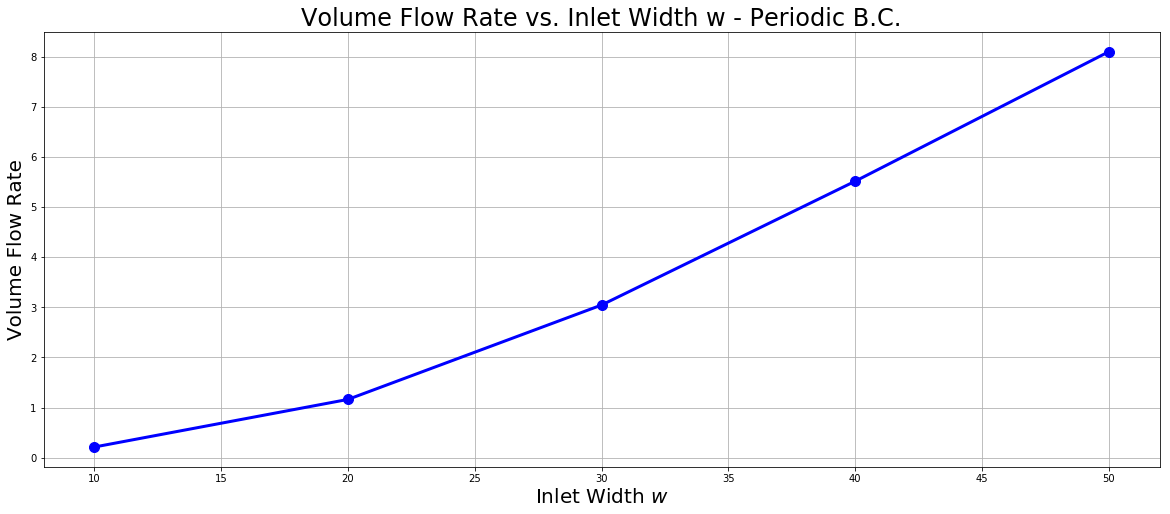

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Volume Flow Rate vs. Inlet Width w - Periodic B.C.', fontsize=24)
ax.set_xlabel('Inlet Width $w$', fontsize=20)
ax.set_ylabel('Volume Flow Rate', fontsize=20)
ax.plot(ws, flow_pbc_w, color='b', marker='o', linewidth=3.0, markersize=10)
fig.savefig('../figs/lbm_pbc_flow_vs_w.png', bbox_inches='tight')
ax.grid()

**Run Non-Periodic Simulation for Multiple widths w**

In [25]:
# Array of volume flow vs. width w
flow_mbc_w = np.zeros(len(ws))

# Iterate over different values of w that were simulated 
for i, w in enumerate(ws):
    outdir = f"lbm_mbc_Re001.out/width_{w}/"
    rho=load_file(fr)[0]
    ux=load_file(fr)[1]
    volume_flow = calc_volume_flow(rho, ux)
    flow_pbc_w[i] = volume_flow
    print(f'Volume flow for w={w} is {volume_flow:0.3f}.')

Volume flow for w=10 is 0.264.
Volume flow for w=20 is 0.772.
Volume flow for w=30 is 1.046.
Volume flow for w=40 is 1.103.
Volume flow for w=50 is 1.087.


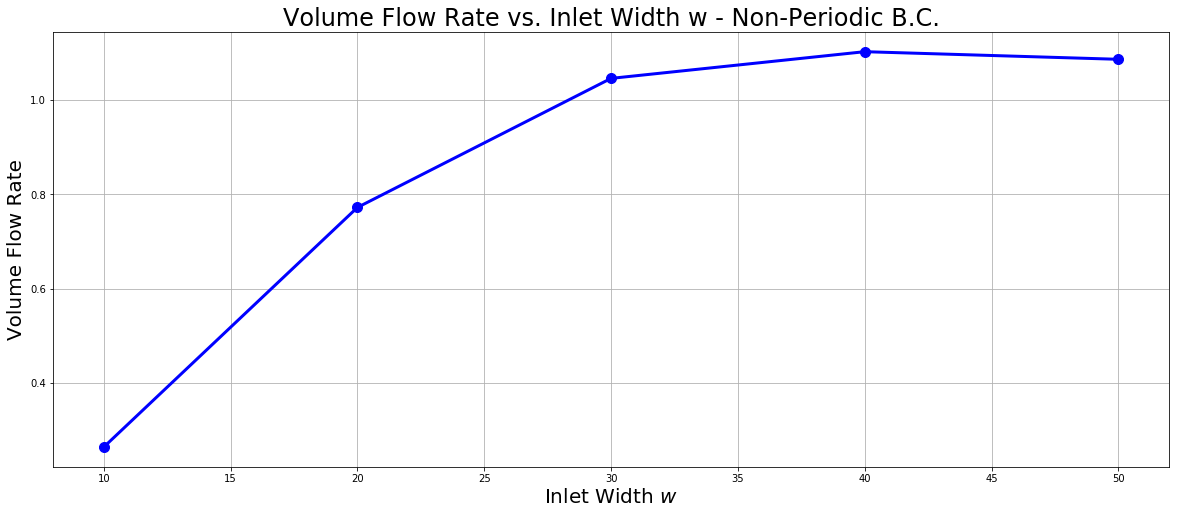

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Volume Flow Rate vs. Inlet Width w - Non-Periodic B.C.', fontsize=24)
ax.set_xlabel('Inlet Width $w$', fontsize=20)
ax.set_ylabel('Volume Flow Rate', fontsize=20)
ax.plot(ws, flow_pbc_w, color='b', marker='o', linewidth=3.0, markersize=10)
fig.savefig('../figs/lbm_mbc_flow_vs_w.png', bbox_inches='tight')
ax.grid()